### This script contains the following:
#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Visualizing variables for potential analysis
#### 4. Regression analysis
    4.1 Regression Analysis on hypothesis (accelerated price increase after sqft living space exceeds 4000 sqft)
    4.2 Regression Analysis on sqft_living of all homes vs price

### 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data

path = r'C:\Users\C SaiVishwanath\Documents\08-2024 King County, Washington_House Sales Analysis'

house_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.csv'))

### 2. Data cleaning

In [5]:
house_sales.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
house_sales.shape

(21612, 20)

In [9]:
house_sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This has been done in another script. Data is clean.  

### 3. Visualizing variables for potential analysis

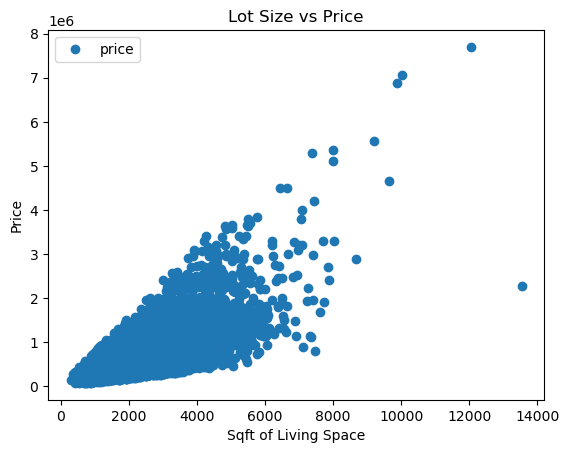

In [11]:
# Scatterplot of variables to analyze

house_sales.plot(x = 'sqft_living', y = 'price', style = 'o')
plt.title('Lot Size vs Price')
plt.xlabel('Sqft of Living Space')
plt.ylabel('Price')
plt.show()

Hypothesis: If the square footage of living space exceeds 4,000 sqft, then house prices will increase at an accelerated rate compared to houses with less than 4,000 square feet.

### 4. Regression analysis

#### 4.1 Regression Analysis on hypothesis (accelerated price increase after sqft living space exceeds 4000 sqft)

In [14]:
# Split the data into subsets for houses <= 4000 sqft and > 4000 sqft
subset_small = house_sales[house_sales['sqft_living'] <= 4000]
subset_large = house_sales[house_sales['sqft_living'] > 4000]

In [16]:
## Convert the variables into arrays

# For houses <= 4000 sqft
X_small = subset_small[['sqft_living']].values.reshape(-1,1)
y_small = subset_small['price'].values.reshape(-1,1)

# For houses > 4000 sqft
X_large = subset_large[['sqft_living']].values.reshape(-1,1)
y_large = subset_large['price'].values.reshape(-1,1)

In [18]:
# Split the data into training and test sets

# For houses <= 4000 sqft
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size = 0.3, random_state=0)

# For houses > 4000 sqft
X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size = 0.3, random_state=0)

In [20]:
# Create regression object
regression_small = LinearRegression()
regression_large = LinearRegression()

In [22]:
# Fit the models to the training data
regression_small.fit(X_small_train, y_small_train)
regression_large.fit(X_large_train, y_large_train)

LinearRegression()

In [24]:
# Make predictions
y_small_predicted = regression_small.predict(X_small_test)
y_large_predicted = regression_large.predict(X_large_test)

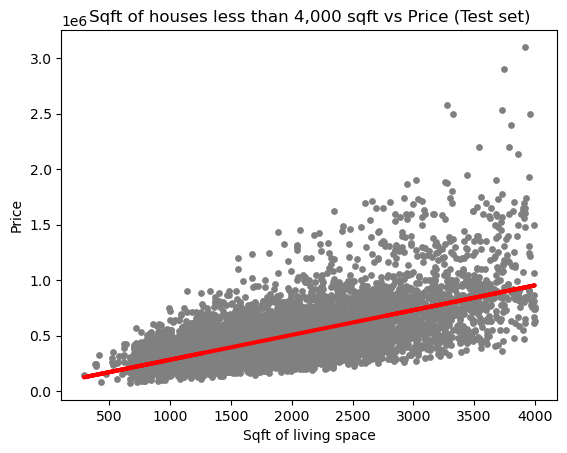

In [26]:
# Create a scatterplot to show the regression line for the 'small subset' (houses <= 4,000 sqft)

plot_small_test = plt
plot_small_test.scatter(X_small_test, y_small_test, color = 'grey', s=15)
plot_small_test.plot(X_small_test, y_small_predicted, color = 'red', linewidth=3)
plot_small_test.title('Sqft of houses less than 4,000 sqft vs Price (Test set)')
plot_small_test.xlabel('Sqft of living space')
plot_small_test.ylabel('Price')
plot_small_test.show()

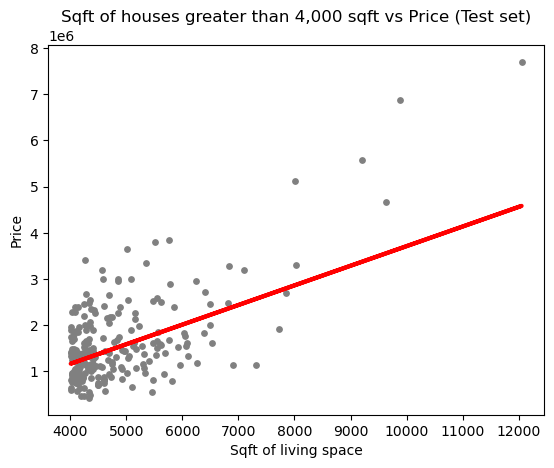

In [28]:
# Create a scatterplot to show the regression line for the 'large subset' (houses > 4,000 sqft)

plot_large_test = plt
plot_large_test.scatter(X_large_test, y_large_test, color = 'grey', s=15)
plot_large_test.plot(X_large_test, y_large_predicted, color = 'red', linewidth=3)
plot_large_test.title('Sqft of houses greater than 4,000 sqft vs Price (Test set)')
plot_large_test.xlabel('Sqft of living space')
plot_large_test.ylabel('Price')
plot_large_test.show()

**Insights:** 
- The scatterplots clearly show that the slope for houses larger than 4,000 sqft is steeper than for houses <= 4,000 sqft.
- While it's hard to say definitively if the 4,000 sqft threshold is the most accurate, we can observe that beyond this point, the rate of price increase accelerates. 
- In the plot for houses <= 4,000 sqft, the regression line fits the data well overall, but as square footage approaches 3,300 sqft, the points start to deviate from the line. This suggests that 3,300 sqft could potentially be a more meaningful threshold.
- For houses > 4,000 sqft, the regression line doesn’t fit as tightly. Though the slope is steeper, the points are more dispersed, indicating less precision in the predictions. The smaller number of houses in this category may contribute to the scatter and reduced accuracy.

In [68]:
# Pull model summary statistics for houses <= 4000 sqft
mse_small = mean_squared_error(y_small_test, y_small_predicted) # This is the mean squared error
rmse_small = np.sqrt(mse_small) # This is the root square mean (same units as the dependent variable 'price')
r2_small = r2_score(y_small_test, y_small_predicted)

# Print summary stats
print('Model Summary Statistics for Houses <= 4000 sqft')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

Model Summary Statistics for Houses <= 4000 sqft
Slope: [[223.06237161]]
Root mean squared error: 212639.93729044942
R2 score: 0.3925458451226056


In [70]:
# Pull model summary statistics for houses > 4000 sqft
mse_large = mean_squared_error(y_large_test, y_large_predicted)
rmse_large = np.sqrt(mse_large)
r2_large = r2_score(y_large_test, y_large_predicted)

# Print summary stats
print('Model Summary Statistics for Houses > 4000 sqft')
print('Slope:', regression_large.coef_)
print('Root mean squared error:', rmse_large)
print('R2 score:', r2_large)

Model Summary Statistics for Houses > 4000 sqft
Slope: [[425.37478533]]
Root mean squared error: 744586.8389181613
R2 score: 0.4018076438240974


In [53]:
# Manual check for houses <= 4000 sqft
data_small = pd.DataFrame({'Actual': y_small_test.flatten(), 'Predicted': y_small_predicted.flatten()})
data_small.head(25)

,Actual,Predicted
0,1045000.0,683372.690417
1,1000000.0,864053.211423
2,585000.0,741368.907036
3,611000.0,473694.061102
4,360000.0,507153.416843
5,430000.0,362162.875296
6,225000.0,310858.529825
7,500000.0,357701.627863
8,571900.0,442465.329076
9,525000.0,703448.303862


In [56]:
# Manual check for houses > 4000 sqft
data_large = pd.DataFrame({'Actual': y_large_test.flatten(), 'Predicted': y_large_predicted.flatten()})
data_large.head(25)

,Actual,Predicted
0,3200000.0,1.394380e+06
1,1612500.0,1.781471e+06
2,3400000.0,1.266768e+06
3,1550000.0,2.036696e+06
4,1300000.0,1.207215e+06
5,932808.0,1.449679e+06
6,623300.0,1.228484e+06
7,1450000.0,1.309305e+06
8,2048000.0,1.449679e+06
9,1335000.0,1.241245e+06


**Insights:**
- **For houses <= 4,000 sqft:**
    - The slope of 223.06 indicates that for every additional sqaure foot of living space, the price increases by about \$223. 
    - The RMSE is around 212,640, meaning that on average, the model's predictions deviate from the actual house prices by about \$213k.
    - The R2 score of 0.39 shows that the model explains about 39% of the variation in prices, which indicates of moderate fit.
 
- **For houses > 4,000 sqft:**
    - The slope is steeper at 425.37, suggesting that each additional square foot adds approximately \$425.37 to the price--a much faster increase compared to smaller homes. 
    - However, the RMSE is significantly larger at around 744,587, which shows that the model's predictions for larger houses deviate from actual prices by a wider margin on average. This is likely due to more variabiilty in prices for larger homes, which the model struggles to capture.
    - The R2 score of 0.40 is slightly better than for smaller homes, but the high RMSE suggests that the fit is less reliable for predicting larger homes prices.
 
**Summary:**
- The slope for larger houses is nearly twice that of smaller homes, confirming that prices increase at a faster rate once square footage exceeds 4,000 sqft.
- While the model performs reasonably well for houses ≤ 4,000 sqft, the larger RMSE for houses > 4,000 sqft indicates a lot of scatter in the data, and the predictions for large homes are less precise. This is likely due to fewer data points and higher variability in the prices of larger homes.

#### 4.2 Regression Analysis on sqft_living of all homes vs price

In [87]:
# Convert the variables into arrays

X = house_sales[['sqft_living']].values.reshape(-1,1)
y = house_sales['price'].values.reshape(-1,1)

In [89]:
# Split the data into two sets: a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [91]:
# Create regression object
regression = LinearRegression()

In [93]:
# Fit the regression oject to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [95]:
# Create a prediction for y on the test set
y_predicted = regression.predict(X_test)

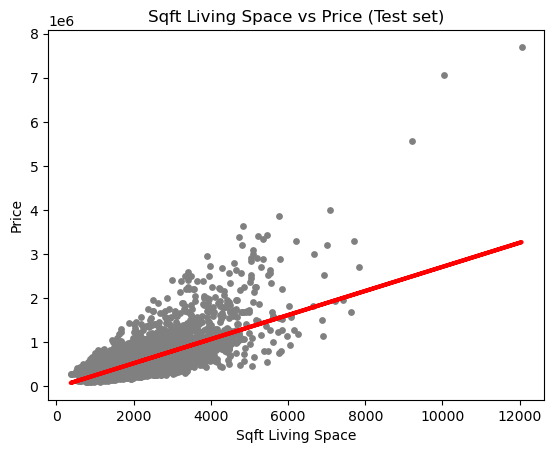

In [97]:
# Create a scatterplot that shows the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Sqft Living Space vs Price (Test set)')
plt.xlabel('Sqft Living Space')
plt.ylabel('Price')
plt.show()

**Insights:**

The model performs reasonably well for homes with 2,000 square feet or less of living space. However, as the square footage increases, the deviation between the actual data points and the regression line becomes more pronounced. While the model provides a moderate fit overall, it is not highly accurate. Given the presence of three homes with over 9,000 square feet of living space priced over $5,000,000, I would have anticipated a steeper slope in the regression line drawing the prices up. 

In [100]:
# Pull model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print summary stats
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[273.70843969]]
Mean squared error: 72796296390.32603
R2 score: 0.5057892303219635


In [102]:
# Manual check
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,900000.0,1.028569e+06
1,405000.0,3.196637e+05
2,780000.0,9.081369e+05
3,379950.0,6.842434e+05
4,1061600.0,7.877051e+05
5,627000.0,5.249450e+05
6,279000.0,5.358934e+05
7,453000.0,4.674663e+05
8,290000.0,3.689312e+05
9,792000.0,8.780289e+05


**Insights:**

The positive slope of the regression line indicates that as the square footage of living space increases, the price also increases.

However, the model has a very high root mean squared error (RMSE). This is evident from the plot, where the distance between each data point and the regression line grows exponentially as square footage exceeds 3,000. This suggests that the model's accuracy diminishes for larger homes.

The R2 score is .5057. This indicates that while the model captures some of the relationship between square footage and price, it leaves a substantial amount of variability unexplained. In other words, approximately 49.43% of the variance in house prices is not accounted for by the model, highlighting its limitations in accurately predicting prices.

Examining the actual versus predicted prices reveals significant variability. Given this, I would not feel confident using this model to predict the price of a house based solely on its square footage.

**Potential Bias and Its Impact:** The data covers 2014 and part of 2015, providing only a snapshot of that time period without much consideration for temporal changes. The dataset includes only houses that were sold, not those currently occupied or on the market. This introduces selection or exclusion bias. Consequently, the model may not accurately represent the current housing market or predict prices for unsold properties. Since it does not account for price trends or market conditions for homes still on the market or recently sold, the model's predictions could be inaccurate, particularly if market conditions have shifted since the data was collected. Furthermore, the homes sold during this period may not reflect the full spectrum of properties available today, impacting the model's accuracy and generalizability.